# Prueba 3

In [6]:
import random
from IPython.display import clear_output
import time
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def new_board(x, y, num_A_live_cells=3, num_A_dead_cells=2, num_B_live_cells=3, num_B_dead_cells=2):
    """Initializes a board for Conway's Game of Life with two types of cells (A and B)"""
    board = []
    for i in range(y):
        row = []
        for j in range(x):
            # Determine the type of the current cell based on the specified ratios for A and B cells
            cell_type = random.choices(['A', 'B'], weights=[num_A_live_cells, num_B_live_cells])[0]
            if cell_type == 'A':
                cell_state = random.choice([0] * num_A_dead_cells + [1] * num_A_live_cells)
            else:
                cell_state = random.choice([0] * num_B_dead_cells + [1] * num_B_live_cells)
            row.append(cell_type if cell_state == 1 else ' ')
        board.append(row)
    return board

def get(board, x, y):
    """Return the value at location (x, y) on a board, wrapping around if out-of-bounds"""
    return board[y % len(board)][x % len(board[0])]


def assign(board, x, y, value):
    """Assigns a value at location (x, y) on a board, wrapping around if out-of-bounds"""
    board[y % len(board)][x % len(board[0])] = value


def count_neighbors(board, x, y,species):
    '''Counts the number of neighboring cells of a specific species at a given location on the board
    Args:
        -   board: list of lists representing the game board
        -   x: x-coordinate of the current cell
        -   y: y-coordinate of the current cell
        -   species: string representing the species of the neighboring cells'''
    species_count = 0

    for dx in range(-1,2):
        for dy in range(-1,2):
            if dx == 0 and dy == 0:
                continue
            if get(board, x + dx, y + dy) == species:
                species_count += 1
        return species_count
    
def process_life(board):
    """Creates the next iteration from a passed state of Conway's Game of Life"""
    next_board = new_board(len(board[0]), len(board))
    for y in range(0, len(board)):
        for x in range(0, len(board[y])):
            # Calculate the number of neighbors for species A and B separately
            num_neighborsA = count_neighbors(board, x, y, species='A')
            num_neighborsB = count_neighbors(board, x, y, species='B')
            
            # Check if the cell is alive for species A and B
            is_aliveA = get(board, x, y) == 1  # Species A
            is_aliveB = get(board, x, y) == 2  # Species B

            # Apply the conditions for cell survival or death for species A
            if num_neighborsA > 3 and is_aliveA:
                assign(next_board, x, y, 0)
            elif num_neighborsA < 2 and is_aliveA:
                assign(next_board, x, y, 0)
            elif num_neighborsB > 2 and is_aliveA:
                assign(next_board, x, y, 0)

            # Apply the conditions for cell survival or death for species B
            elif num_neighborsB > 3 and is_aliveB:
                assign(next_board, x, y, 0)
            elif num_neighborsB < 2 and is_aliveB:
                assign(next_board, x, y, 0)
            elif num_neighborsA > 2 and is_aliveB:
                assign(next_board, x, y, 0)

            # Apply the conditions for cell birth for species A
            elif 2 <= num_neighborsA <= 3 and num_neighborsB < 2 and is_aliveA:
                assign(next_board, x, y, 1)

            # Apply the conditions for cell birth for species B
            elif 2 <= num_neighborsB <= 3 and num_neighborsA < 2 and is_aliveB:
                assign(next_board, x, y, 2)

            # Apply the conditions for cell birth for species A and B
            elif num_neighborsA == 3 and num_neighborsB <= 2 and not is_aliveA:
                assign(next_board, x, y, 1)
            elif num_neighborsB == 3 and num_neighborsA <= 2 and not is_aliveB:
                assign(next_board, x, y, 2)

    return next_board

In [3]:
def draw_board(board):
    res = ''
    for row in board:
        for col in row:
            if col == 1:
                res += 'A '
            elif col == 2:
                res += 'B '
            else:
                res += ' '
        res += '\n'
    return res

board = new_board(50, 50)

NUM_ITERATIONS = 1000
NA = []
NB = []
for i in range(0,NUM_ITERATIONS):
    print('Iteration ' + str(i + 1))
    board = process_life(board)
    num_A = sum(row.count('A') for row in board)
    num_B = sum(row.count('B') for row in board)
    NA.append(num_A)
    NB.append(num_B)
    res = draw_board(board)
    print(res)
    time.sleep(0.01)
    clear_output(wait=True)

Iteration 1000
                               B        A           
                               B                B   
                                               B   
  B                          B   A                B   
  B         A                 B                   B   
                                              A B   
                                                  
                       B                   A        
   A      B                                         
  A A                                               
   A                                A               
   A          A          A                           
             A                                     
                                      A            
                                                  
 A    B     B                                        
A     B     B       B                                 
                                        A          
      A B               A      

In [4]:
NT = np.sum(NA[-1])+np.sum(NB[-1])
NT

1400

(array([ 14.,  55., 179., 249., 258., 153.,  70.,  15.,   6.,   1.]),
 array([620. , 635.5, 651. , 666.5, 682. , 697.5, 713. , 728.5, 744. ,
        759.5, 775. ]),
 <BarContainer object of 10 artists>)

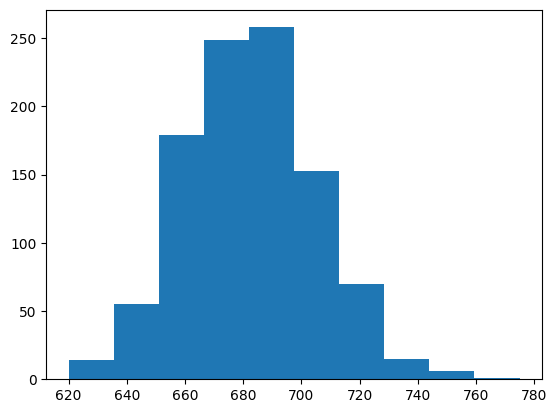

In [7]:
plt.hist(NA)

(array([  8.,  28.,  80., 145., 205., 266., 150.,  78.,  32.,   8.]),
 array([616. , 629.2, 642.4, 655.6, 668.8, 682. , 695.2, 708.4, 721.6,
        734.8, 748. ]),
 <BarContainer object of 10 artists>)

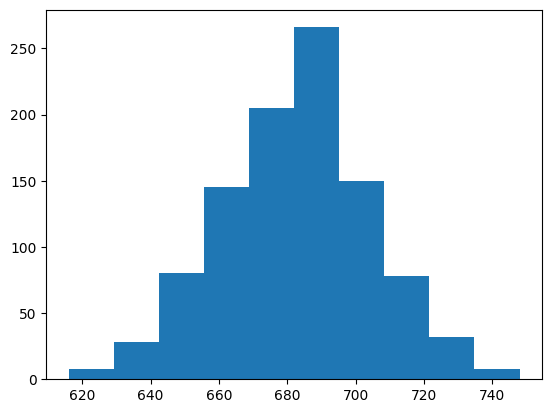

In [8]:
plt.hist(NB)

Text(0, 0.5, 'Numero de celulas de B')

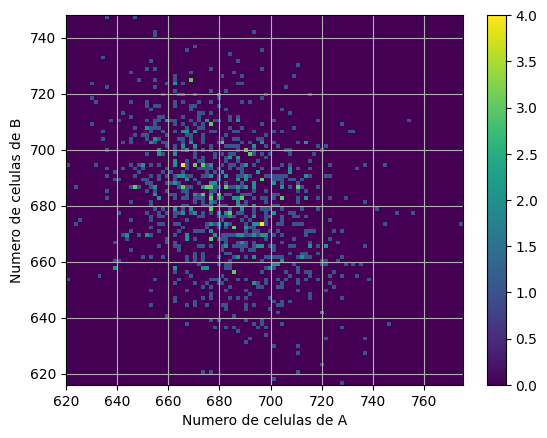

In [9]:
plt.hist2d(NA,NB,bins=100)
plt.colorbar()
plt.grid()
plt.xlabel('Numero de celulas de A')
plt.ylabel('Numero de celulas de B')

[0.39101362 0.24832059]
2


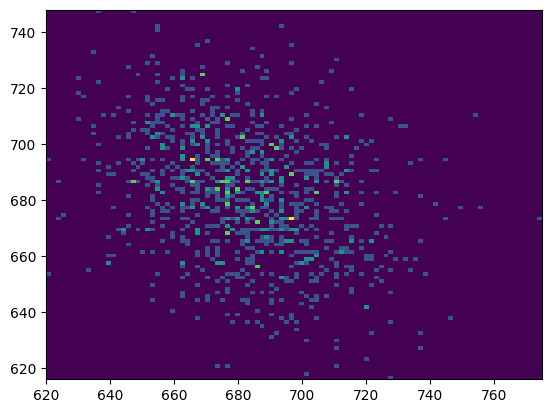

In [10]:
b = np.array([np.random.uniform(0,1),np.random.uniform(0,1)])
print(b)
print(len(b))
A = plt.hist2d(NA,NB,bins=100)
x_edges,y_edges = A[1], A[2]